In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1.Getting our Data ready to be used with machine learning 
The main things we have to do:
    1. Split the data into features and labels(usaually 'x' and 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values ( also called feature encoding )
    

In [2]:
heart_disease=pd.read_csv(r"heart-disease.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x=heart_disease.drop("target",axis=1)

In [5]:
y=heart_disease["target"]

In [6]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
# Splitting the data into training data and test data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Getting Your Data Ready: Convert Data to number

* Make sure it's all numerical

In [14]:
car_sales=pd.read_csv(r"car-sales-extended.csv")

In [15]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [16]:
len(car_sales)

1000

In [17]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [18]:
# Split into X/y
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [20]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [21]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [22]:
# Split data into training data and test Data

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Toyota'

In [34]:
# As you can see we need to turn features which have string datatypes to numbers 

In [36]:
# Turn Categories into number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]

one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
pd.DataFrame(transformed_x)  # All string values converted to numerical values

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42652.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,163453.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,43120.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,130538.0
9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,51029.0


In [41]:
# Another way of converting data using pandas
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]]) # Here we have given a list of features who's datatype we want to convert
dummies.head(10)

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
5,4,0,1,0,0,0,0,0,1,0
6,4,0,0,0,1,0,1,0,0,0
7,4,0,1,0,0,0,0,0,0,1
8,4,0,0,1,0,0,0,0,0,1
9,4,0,1,0,0,0,1,0,0,0


In [39]:
# Now Let's refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.30431565439836705

### 1.2 Getting Your Data Ready: Handling missing data with pandas

1.2 What if there were missing values?
  1. Fill them with some value(also known as imputation)
  2. Remove the samples with missing data altogether

In [5]:
# Import car sales missing data 
car_sales_missing = pd.read_csv(r"C:\Users\DELL\Desktop\zero-to-mastery-ml\data\car-sales-extended-missing-data.csv")
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [6]:
# To find how many missing values do we have in data columns
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [7]:
# Now let's create X and y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [8]:
# Let's try to convert our data to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(X)
transformed_x

ValueError: Input contains NaN

In [9]:
# As you can see the data has missing values or data

#### Option 1. Filling missing data with pandas

In [10]:
# Fill the "make" column
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors"  column
car_sales_missing["Doors"].fillna(4, inplace=True)

car_sales_missing.isna().sum()


Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [11]:
# Remove rows with missing Price Value

In [12]:
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [13]:
# Now let's create X and y
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [15]:
# Let's try to convert our data to numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2. Filling missing values with scikit-learn 

In [2]:
car_sales_missing=pd.read_csv(r"C:\Users\DELL\Desktop\zero-to-mastery-ml\data\car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [5]:
car_sales_missing.dropna(subset=["Price"],inplace=True)

In [6]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [7]:
# Split the data into X and y
from sklearn.model_selection import train_test_split

X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
# Fill categorical values with missing and numberical values with means
car_impute=SimpleImputer(strategy="constant",fill_value="missing")
doors_impute=SimpleImputer(strategy="constant",fill_value=4)
Odometer_impute=SimpleImputer(strategy="mean")


In [12]:
# Define different column features
categorical_features=["Make","Colour"]
doors_feature=["Doors"]
numerical_features=["Odometer (KM)"]

In [14]:
imputer=ColumnTransformer([
                         ("car_imputer",car_impute,categorical_features),
                         ("doors_imputer",doors_impute,doors_feature),
                         ("Odometer_imputer",Odometer_impute,numerical_features)])

# Fill train and test values separately
filled_X_train=imputer.fit_transform(X_train)
filled_X_test=imputer.transform(X_test)

filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [15]:
# Get our transformed data array's back into DataFrame's
car_sales_missing_train=pd.DataFrame(filled_X_train,columns=["Make","Colour","Doors","Odometer (KM)"])

car_sales_missing_test=pd.DataFrame(filled_X_test,columns=["Make","Colour","Doors","Odometer (KM)"])

car_sales_missing_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [16]:
# Now check the original data for missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [18]:
# Now let's convert categorical values of our data to numerical values
from sklearn.preprocessing import OneHotEncoder

categorical_features=["Make","Colour","Doors"]

one_hot=OneHotEncoder()

transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X_train=transformer.fit_transform(car_sales_missing_train)

transformed_X_test=transformer.transform(car_sales_missing_test)

transformed_X_train.toarray()


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [22]:
# Now that we have transformed our data, let's see if we can fit a model 
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=90)

model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)

0.2149808210604971

## 2. Choosing the right estimator/algorithm for our problem

Scikit learn uses estimator as another term for machine learning model or algorithm
* Classification- predicting whether a sample is one thing or another
* Regression- predicting a number
* Step 1- Check the scikit learn machine learning map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [24]:
# Import Boston Housing dataset

In [28]:
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [29]:
# Change this dataset to dataframe
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
# Following scikit learn machine learning map
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge
# set up randon seed
np.random.seed(42)

# Create the data
X=boston_df.drop("target", axis=1)
y=boston_df["target"]

# split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Ridge Model
model=Ridge()

model.fit(X_train,y_train)

# Check the score of ridge model on test data
model.score(X_test,y_test)




0.6662221670168522

In [31]:
# Still score of this model is quite low
# Let's see what we can do, refer back to machine leaning map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
# According to the map if Ridge won't work then we can use Ensemble Regressors 
# So let's try RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop("target",axis=1)
Y=boston_df["target"]

x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2)

rf=RandomForestRegressor(n_estimators=100)

rf.fit(x_train,Y_train)
rf.score(x_test,Y_test)

0.873969014117403

In [36]:
 # So as you can see our current machine learning is better than the previous one

## 2.2 Choosing an estimator for a classification problem

let's go the map....https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [2]:
heart_disease=pd.read_csv(r"C:\Users\DELL\Desktop\Machine-learning-and-data-science\Scikit-Learn\heart-disease.csv")

In [53]:
heart_disease.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


So let's follow scikit-learn machine learning map to find the best machine learning maodel.....https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [39]:
# Checked the map and it says  LinearSCV

In [54]:
# Import LinearSCV estimator class
from sklearn.svm import LinearSVC

# Setup random seed 
np.random.seed(42)

# Define data 
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

# Split train and test data sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Define model
clf=LinearSVC()

# Fit model to the data 
clf.fit(X_train,y_train)

# Check score of the model
clf.score(X_test,y_test)



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [41]:
# So the model score showing, this model is not good enough 
# If the current model is not working, try different model 

Titbit:-
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [3]:
# So let's try ensemble class machine learning model
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Define data 
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split the data into test and train sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Model
model=RandomForestClassifier(n_estimators=100)

# Fit the model to the data
model.fit(X_train,y_train)

#  Let's check the score of our model on test data set
model.score(X_test,y_test)

NameError: name 'train_test_split' is not defined

## 3. Fit the model/algorithm on our data and use it to make predictions

3.1 Fitting the model to the data 
 * X= features, feature variables,data
 * y= lables, targets, target variables

In [5]:
# So let's try ensemble class machine learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Setup random seed
np.random.seed(42)

# Define data 
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

# Split the data into test and train sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate Model
model=RandomForestClassifier(n_estimators=100)

# Fit the model to the data ( train the machine learning model with the training data set )
model.fit(X_train,y_train)

#  Let's check the score of our model on test data set (test the patterns learn by our model on the training data set by using test data set)
model.score(X_test,y_test)

0.8524590163934426

### 3.2 Make predictions using machine learning model

2 Ways to make predictions:-
    1.`predict()`
    2.`predict_proba()`

In [47]:
# Use a trained model to make predictions
model.predict(1,2,3,4,5) # This doesn't work

TypeError: predict() takes 2 positional arguments but 6 were given

In [48]:
model.predict(X_test)  # Our model has made prediction on our given test data

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
np.array(y_test)   # Our original outcomes or true outcomes

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
# Compare predictions to the truth labels to evaluate the model
preds_y=model.predict(X_test)
np.mean(preds_y==y_test)

0.8524590163934426

In [56]:
# another way
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds_y)

0.8524590163934426

make predictions with `predict_proba()`


In [57]:
# predict_proba() returns probabilities of a classification label

In [59]:
model.predict_proba(X_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [60]:
model.predict(X_test[:10])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [1]:
# As you can see predict_proba() predicts probabilities of 0s and 1s

### Make predictions with our model for regression problem

`predict()` can also be used for regression models

In [22]:
# Import Boston Data set
from sklearn.datasets import load_boston
boston=load_boston()
boston;

In [23]:
# Convert boston data set to data frame
boston_df=pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"]=boston["target"]
boston_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [12]:
# making predictions using predict() for a regression model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Create the data 
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

# Split the data into training and test data sets 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instantiate model and fit it
model=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# make predictions using predict method
y_preds=model.predict(X_test)

y_preds[:15]

array([44.698, 21.079, 21.237, 21.87 , 32.702, 19.453, 22.466, 20.378,
       19.125, 15.3  , 12.105, 22.444, 14.028, 15.392, 16.182])

In [14]:
np.array(y_test[:15])

array([26.4, 50. , 34.9, 37.3, 45.4, 19.3, 27.5,  8.5, 25. , 36.2, 20.9,
       11.7, 13.4, 22.2, 43.1])

In [15]:
# Compare the predictions to the truth labels
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

# Our regression model has an error margin of 2.11

2.118558823529411

## 4. Evaluating a machine learning model 

for help search for scikit learn evaluating a model

### Three ways to evaluate Scikit learn models/estimators:
    1.Estimator `score` method
    2.The `scoring parameter`
    3.Problem specific metric functions

### 4.1 Evaluating a model with score method

In [18]:
# For a Classification problem 

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

# Using score method to evaluate a model
clf.score(X_test,y_test)

0.8524590163934426

In [19]:
# For a Regression problem
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x=boston_df.drop("target",axis=1)
Y=boston_df["target"]

x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,Y_train)

# Using score method to evaluate a model
model.score(x_test,Y_test)

0.873969014117403

## 4.2 Evaluating a model using the score parameters (cross validation)

In [20]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

In [21]:
cross_val_score(clf,X,y)   # To overcome this warning use cv=5 as an attribute

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.82178218, 0.84158416, 0.78217822])

In [23]:
# Evaluating the model using cross_validation or scoring parameter
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.8852459 , 0.7704918 , 0.8       , 0.75      ])

In [24]:
# As one can notice score method gives back only one outcome whereas cross validation gives back an array of 5 as an output

In [25]:
# So let's figure out why cross validation is giving back an array of 5
# In cross validation the model is trained on 5 different version of training data, and evaluated on 5 different versions of 
# test data 

In [27]:
# Let's compare the two methods
# Single training and test split score
clf_single_score=clf.score(X_test,y_test)

# Take the mean of 5-fold cross validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

# Now compare the two methods
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8216939890710384)

In [28]:
# Scoring parameter in cross validation method is set to none by default
# Default scoring parameter of classifier=mean accuracy
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.83606557, 0.90163934, 0.78688525, 0.83333333, 0.78333333])

### 4.2.1 Classification model evaluation matrics
1. Accuracy
2. Area Under ROC curve
3. Confusion Matrix
4. Classification report

In [30]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [6]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier(n_estimators=100)
cross_val_score=cross_val_score(clf,X,y,cv=5)
print(f"Heart Disease Classifier cross-validated accuracy: {np.mean(cross_val_score)*100:2f}%")


Heart Disease Classifier cross-validated accuracy: 82.480874%


**Area Under the Receiver Operating Characteristic Curve (AUC/ROC)**
* Area Under Curve (AUC)
* ROC Curve
* ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

In [7]:
# Create data 
from sklearn.metrics import roc_curve

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# We already has a model called clf we just have fit it on our training data
clf.fit(X_train,y_train)

# Now make predictions using probabilities
y_probs=clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]), 61)

In [8]:
# Now let's get true positive rates of the model
y_probs_positive=y_probs[:,1]

In [9]:
y_probs_positive[:15]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85])

In [10]:
# Calculate fpr,tpr and thresholds 

fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# Check the false positive rates fpr
fpr



array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

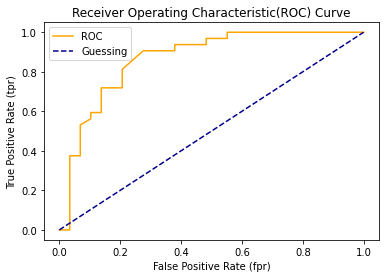

In [11]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    '''
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model
    '''
    # Plot roc curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle="--",label="Guessing")
    
    
    # Customize the plot 
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel("True Positive Rate (tpr)")
    
    plt.title("Receiver Operating Characteristic(ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)
    

In [12]:
# Now let's check roc score using roc_auc_score method 
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

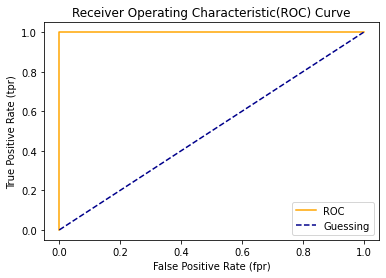

In [13]:
# Now let's plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)

In [14]:
## perfect AUC Score 
roc_auc_score(y_test,y_test) 

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and actual labels it was suppose to predict. In 
essence give you an idea of where the model is getting confused

In [15]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [16]:
# Let's visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,y_preds,rownames=["Actual Label"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [17]:
# Make our confusion matrix more visual with seaborn's heat map
import seaborn as sns

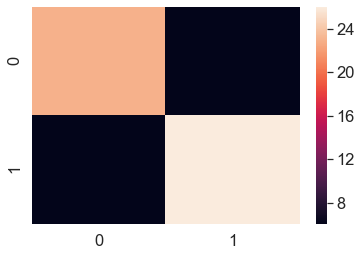

In [18]:
# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# plot it using seaborn's heat map
sns.heatmap(conf_mat);

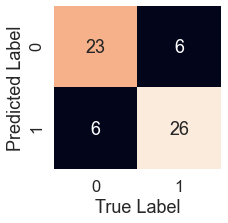

In [19]:
# Seaborn is not showing any numbers inside it's heatmap so let's figure out how to do it
def plot_conf_mat(conf_mat):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat,annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label");

    
plot_conf_mat(conf_mat)

**Classification Report**

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



* Accuracy-is a good measure to start with if all classes are balanced (eg. same amount of samples which are labelled with 0 or 1).
* Precision and recall become more important when classes are balanced.
   * If false positive predictions are worse than false negatives.
   * If false negative predictions are worse than false positives, aim for higher recall.
* F1-score is a combination of precision and recall

## 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentations link...https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2 method**

In [38]:
# Model evaluation using r-squared method
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train);


In [33]:
model.score(X_test,y_test) # Evaluating model using score method

0.873969014117403

What R^2 does: Compares your models predictions to the mean of the targets. Values can range from negative infinity(a very poor model) to 1.
For example if all your model predicted values are mean of the targets then it's R^2 value will be 0. And if your model perfectly predicts a range of numbers then it's R^2 value will be 1    

In [75]:
from sklearn.metrics import r2_score

# Now fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())


In [74]:
j=r2_score(y_test,y_test_mean)
j.round(decimals=2)

0.0

In [41]:
r2_score(y_test,y_test)

1.0

**Mean Absolute Error (MAE)**

In [43]:
from sklearn.metrics import mean_absolute_error

MAE is the average of the absolute differences between predictions and actual values.It gives you an idea of how wrong your models predictions are.

In [49]:
y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [57]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["difference"]=df["predicted values"] - df["actual values"]
df.round(decimals=3)

,actual values,predicted values,difference
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
76,20.0,21.725,1.725
316,17.8,19.232,1.432
140,14.0,15.239,1.239
471,19.6,21.067,1.467
500,16.8,20.738,3.938


**Mean Squared Error (MSE)**

In [81]:
# Evaluating A regression model(Mean squared Error)
from sklearn.metrics import mean_squared_error
y_preds=model.predict(X_test)

mse=mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [82]:
# Let's calculate MSE by hand:
squared=np.square(df["difference"])
np.mean(squared)

9.24232899019608

### 4.2.3 Finally using `scoring` parameters

In [83]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X=heart_disease.drop('target',axis=1)
y=heart_disease["target"]

model=RandomForestClassifier(n_estimators=100)

In [85]:
np.random.seed(42) # Default value of scoring for classification model in cross validation method is accuracy
cv_acc=cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_acc)

0.8248087431693989

In [86]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is:82.48%


**metric scoring=accuracy**

In [87]:
np.random.seed(42)
cv_acc1=cross_val_score(model,X,y,cv=5,scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc1)*100:.2f}%")

The cross-validated accuracy is: 82.48%


**metric scoring='precision'**

In [88]:
cv_precision=cross_val_score(model,X,y,cv=5,scoring="precision")
cv_precision

array([0.76315789, 0.90322581, 0.83870968, 0.79411765, 0.74358974])

In [89]:
np.mean(cv_precision)

0.8085601538512754

**metric scoring="recall"**

In [90]:
cv_recall=cross_val_score(model,X,y,cv=5,scoring='recall')
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.78787879, 0.90909091])

In [91]:
np.mean(cv_recall)

0.8424242424242424

**metric scoring=F1**

In [92]:
cv_f1=cross_val_score(model,X,y,cv=5,scoring="f1")
cv_f1

array([0.8358209 , 0.89230769, 0.84848485, 0.83076923, 0.8       ])

In [93]:
np.mean(cv_f1)

0.841476533416832

In [94]:
# Let's try this on regression model

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

clf=RandomForestRegressor(n_estimators=100)


**R^2 (R squared method)**

In [110]:
np.random.seed(42)
cv_r2=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [111]:
np.mean(cv_r2)

0.622375083951403

In [114]:
np.random.seed(42)
cv_r2=cross_val_score(clf,X,y,cv=5,scoring="r2")
np.mean(cv_r2)

0.622375083951403

**Mean Absolute Error(MAE)**

In [106]:
np.random.seed(42)
cv_mae=cross_val_score(clf,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366])

In [107]:
np.mean(cv_mae)

-3.0314302853814783

**Mean Squared Error (MSE)**

In [108]:
np.random.seed(42)
cv_mse=cross_val_score(clf,X,y,cv=5,scoring="neg_mean_squared_error")
cv_mse

array([ -7.99104182, -12.88009356, -20.06894699, -45.70549288,
       -19.77049657])

In [109]:
np.mean(cv_mse)

-21.283214366686064

## 4.3 Using different evaluation metric Scikit-Learn function

**Classification evaluation functions**

In [116]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)
# making predictions using our machine learning model
y_preds=model.predict(X_test)


In [119]:
# Evaluate the classifier

print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds):.4f}")
print(f"Recall:{recall_score(y_test,y_preds)}")
print(f"F1:{f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8485
Recall:0.875
F1:0.8615384615384615


**Regression Evaluation Function**

In [124]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestRegressor(n_estimators=100)
clf.fit(X_train,y_train)

# Make predictions using our regressor model
y_preds=clf.predict(X_test)

In [126]:
# Evaluate the regression model
print("Regression model metrics pn the test set")
print(f"R squared: {r2_score(y_test,y_preds)}")
print(f"Mean Absolute error: {mean_absolute_error(y_test,y_preds)}")
print(f"Mean Squared error: {mean_squared_error(y_test,y_preds)}")

Regression model metrics pn the test set
R squared: 0.8739690141174031
Mean Absolute error: 2.1226372549019623
Mean Squared error: 9.242328990196082


## 5. Improving a machine learning model 

First predictions= baseline predictions
first model =baseline model

How one can improve a model:
1. From a data perspective
* Could we collect more data? (generally the more, the better)
* Could we improve our data?

2. From a model perspective:
* Is there a better model we could use?
* Could we improve our current model?

Parameters vs Hyperparameters:

* Parameters= Model find these patterns in data 
* Hyperparameters= Settings on a model you can adjust to (potentially) improve it's ability to find patterns.

Three ways to adust hyperparameters:
1. By hand
2. randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [127]:
### 5.1 Tuning hyperparameters by hand
# let's make 3 sets, train, validation and test 

We'll going to try and adjust:
* `max_depth`
* `min_samples_leaf`
* `max_features`
* `min_samples_split`
* `n_estimators`

In [136]:
# hyperparameters
from sklearn.ensemble import RandomForestClassifier

def evaluate_preds(y_truth,y_preds):
    '''
    performs evaluation camparison on y_truth lables and y_preds labels 
    '''
    accuracy=accuracy_score(y_truth,y_preds)
    precision=precision_score(y_truth,y_preds)
    recall=recall_score(y_truth,y_preds)
    f1=f1_score(y_truth,y_preds)
    
    metrics_dic={"accuracy":round(accuracy,2),"precision":round(precision,2),"recall":round(recall,2),"f1":round(f1,2)}
    
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metrics_dic
    

In [133]:
# Shuffle the data 
np.random.seed(42)

heart_disease_shuffled=heart_disease.sample(frac=1)
heart_disease_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [134]:
# Split the data into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split the data into train, validation and test sets 
train_split=round(0.7 * len(heart_disease_shuffled))
valid_split=round(train_split + 0.15*len(heart_disease_shuffled))

X_train,y_train=X[:train_split], y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [137]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
np.random.seed(42)
clf.fit(X_train,y_train)

# make prediction 
y_preds=clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics


Acc:82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [138]:
# Create a second classification model using different hyper parameters
np.random.seed(42)
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)
# make predictions with different hyperparameters
y_preds2=clf_2.predict(X_valid)

# Evaluate the second classification model 
baseline_metrics2=evaluate_preds(y_valid,y_preds2)
baseline_metrics2

Acc:82.22%
Precision: 0.84
Recall: 0.84
F1: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2 Hyperparameters tuning with the help of RandomizedSearchCV

In [143]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,50,80,100,200,300,500,1000,1200],"max_depth":[None,5,10,15,20,30],"max_features":["auto","sqrt"],"min_samples_split":[2,4,6],"min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split data into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# instantiate the RandomforestClassifier
clf=RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=20,cv=5,verbose=2)

# fit the randomizedsearchCv vesrion of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=10, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=15 
[CV]  n_estima

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, 

[CV]  n_estimators=80, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=80, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=80, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=80, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  n_estimators=80, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   0.0s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=10, total=   0.3s
[CV] n_estimators=500, min_samples_split=4, min

[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.1s
[CV] n_estimators=300, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=300, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=80, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=80, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=80, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=80, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   0.0s
[CV] n_estimators=80, min_samples_split=4, min_samples_l

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   30.4s finished
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [144]:
# get the best hyperparameters
rs_clf.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [146]:
# Make prediction with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

# Evaluate the prediction
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc:83.61%
Precision: 0.78
Recall: 0.89
F1: 0.83
